# Chicago Crime Type Prediction

## goal: predict the type of crimes that can occur

In [1]:
import wrangle as w
import pandas as pd
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crimes-2001-to-present-chicago.csv')

In [3]:
df = w.prep_crime_data(df)

In [4]:
df

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING
Date,,,,,,,,,,
2018-08-02,263,150,50,82,36,24,0,0,1,1
2018-08-03,265,157,51,74,33,36,2,0,7,1
2018-08-04,241,201,62,87,34,34,4,0,4,0
2018-08-05,223,199,77,97,20,18,8,0,4,2
2018-08-06,215,130,52,74,26,35,3,0,7,0
...,...,...,...,...,...,...,...,...,...,...
2023-07-05,141,173,68,105,71,13,3,0,8,1
2023-07-06,116,101,61,93,57,24,1,0,0,2
2023-07-07,141,117,61,82,85,14,0,0,3,1


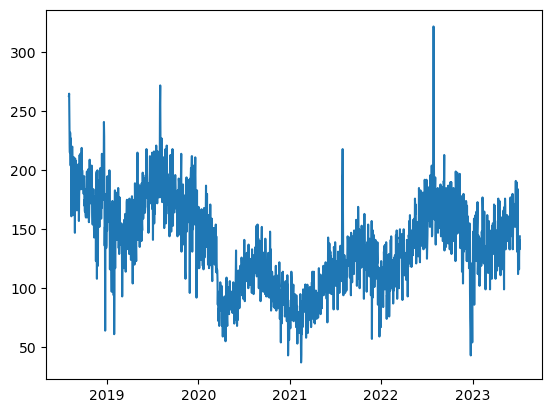

In [5]:
plt.plot(df.index, df.THEFT)


In [6]:
y = df.THEFT

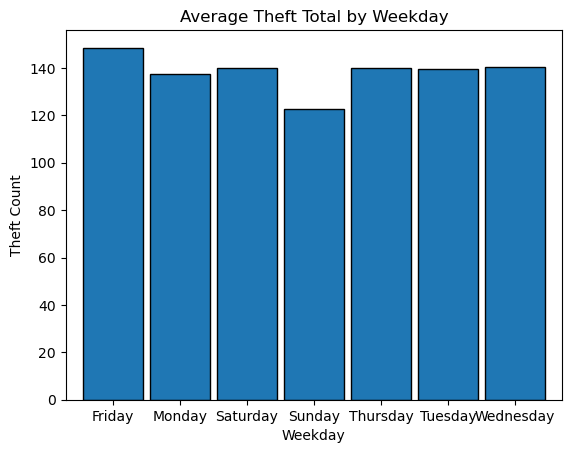

In [17]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Theft Total by Weekday', xlabel='Weekday', ylabel='Theft Count')
plt.show()

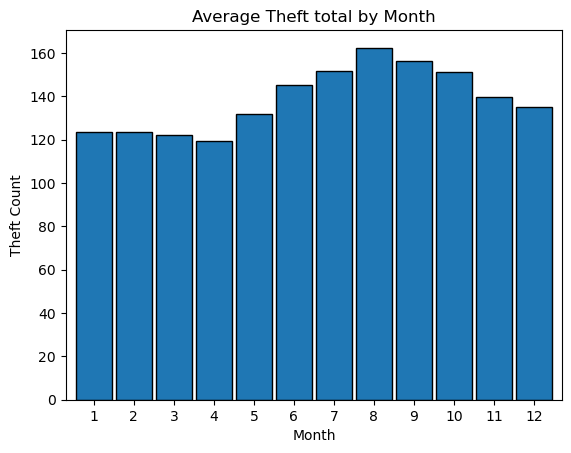

In [16]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Theft total by Month', xlabel='Month', ylabel='Theft Count')
plt.show()

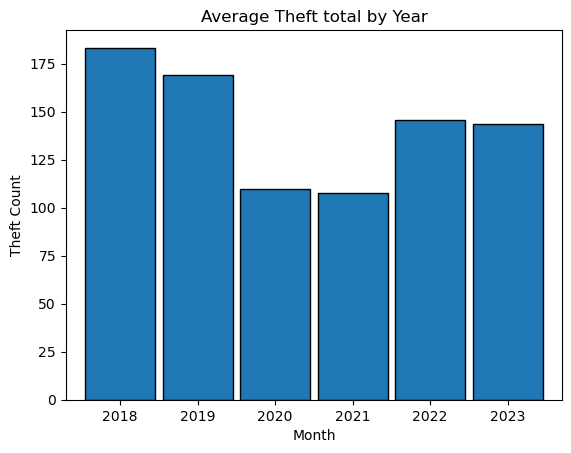

In [18]:
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Theft total by Year', xlabel='Month', ylabel='Theft Count')
plt.show()

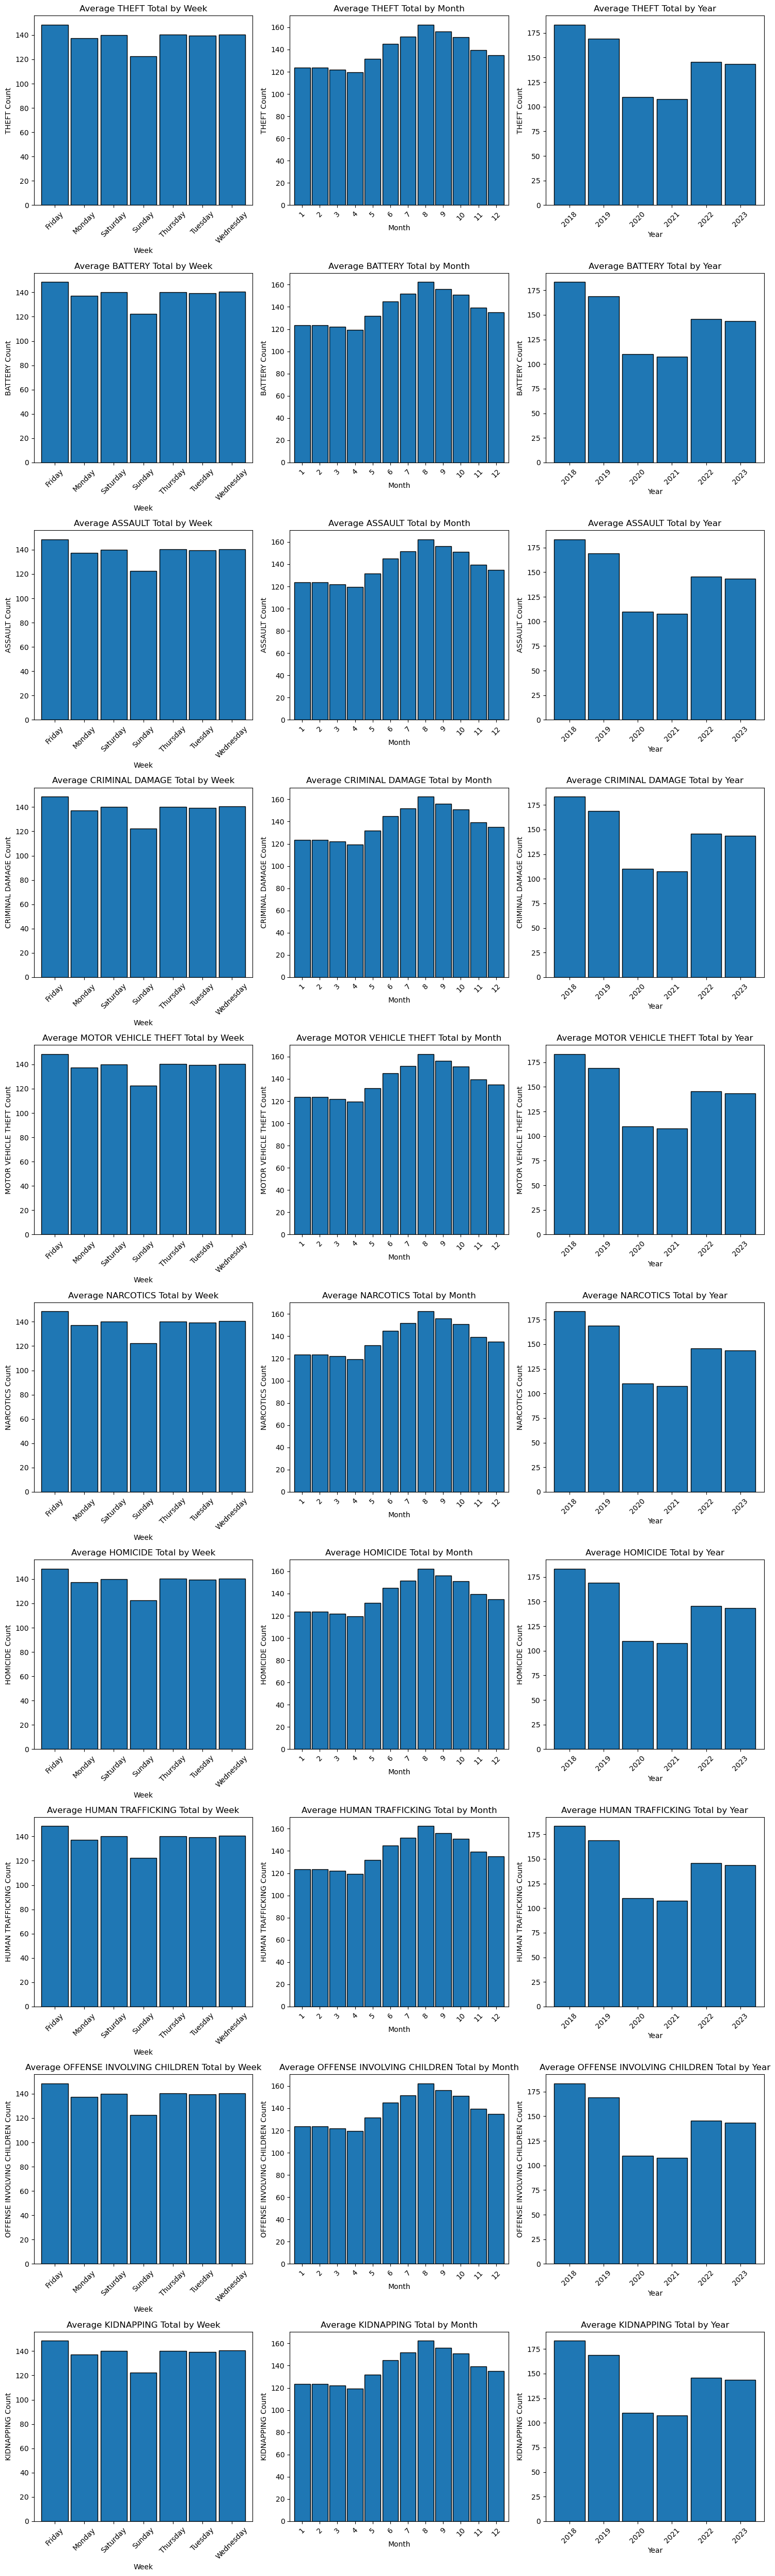

In [24]:
columns_to_plot = ['THEFT', 'BATTERY', 'ASSAULT', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'HOMICIDE', 'HUMAN TRAFFICKING', 'OFFENSE INVOLVING CHILDREN', 'KIDNAPPING']

# Loop through each column and plot against time (week, month, year)
fig, axs = plt.subplots(len(columns_to_plot), 3, figsize=(15, 5*len(columns_to_plot)), tight_layout=True)

for i, column in enumerate(columns_to_plot):
    # Resample by week and plot
    ax_week =  y.groupby(y.index.day_name()).mean().plot.bar(width=0.9, ec='black', ax=axs[i, 0])
    ax_week.set(title=f'Average {column} Total by Week', xlabel='Week', ylabel=f'{column} Count')
    
    # Resample by month and plot
    ax_month = y.groupby(y.index.month).mean().plot.bar(width=0.9, ec='black', ax=axs[i, 1])
    ax_month.set(title=f'Average {column} Total by Month', xlabel='Month', ylabel=f'{column} Count')
    

    # Resample by year and plot
    ax_year = y.groupby(y.index.year).mean().plot.bar(width=0.9, ec='black', ax=axs[i, 2])
    ax_year.set(title=f'Average {column} Total by Year', xlabel='Year', ylabel=f'{column} Count')

    # Rotate x-axis labels for better readability
    ax_week.tick_params(axis='x', rotation=45)
    ax_month.tick_params(axis='x', rotation=45)
    ax_year.tick_params(axis='x', rotation=45)
    

plt.tight_layout()
plt.show()




